In [547]:
# Housing Prices Kaggle competition
# Python version 3.7.7
# 11/22/2021

import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from platform import python_version

print(python_version())

3.7.7


In [1]:
import os
os.getcwd()

'/Users/auriang/Documents/Kaggle/house-prices-advanced-regression-techniques'

In [548]:
# Read in dataset
df = pd.read_csv('train.csv')
test_final = pd.read_csv('test.csv')

data = df.copy()
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [549]:
data.shape

(1460, 81)

In [550]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [551]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
data.describe(exclude='number')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


In [552]:
# Categorical data that doesn't describe much
# Utilities, Condition2

data['Utilities'].value_counts()
data['Condition1'].value_counts()

Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

In [553]:
data.describe(exclude='object')

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [554]:
# numerical data that doesn't describe much
# Id

# Drop Numerical and Categorical columns of no use
columns = ['Id', 'Utilities']
data.drop(columns=columns, inplace=True)
data.shape

(1460, 79)

In [555]:
X = data.drop(columns='SalePrice', axis=1)
y = data[['SalePrice']]

X.shape

(1460, 78)

### Feature Engineering

In [556]:
# Create buckets for the YearBuilt, YearRemodelAd, Garage Year Built
def year_buckets(value):
    if value < 1920:
        return 'old'
    if 1920 <= value < 1940:
        return '20-30s'
    if 1940 <= value < 1950:
        return '40s'
    if 1950 <= value < 1960:
        return '50s'
    if 1960 <= value < 1970:
        return '60s'
    if 1970 <= value < 1980:
        return '70s'
    if 1980 <= value < 1990:
        return '80s'
    if 1990 <= value < 2000:
        return '90s'
    if 2000 <= value:
        return '2000s'

In [557]:
# Create buckets for the Months
def month_buckets(value):
    if value < 4:
        return 'Q1'
    if 4 <= value < 7:
        return 'Q2'
    if 7 <= value < 10:
        return 'Q3'
    if 10 <= value:
        return 'Q4'

In [558]:
# Apply year buckets
data['YearBuilt_Bucket'] = data['YearBuilt'].apply(year_buckets)
data['YearRemodAdd_Bucket'] = data['YearRemodAdd'].apply(year_buckets)

# Apply quarter buckets
data['MoSold_Buckets'] = data['MoSold'].apply(month_buckets)

In [559]:
## Let's change the year variables into categoricals
# YearBuilt, YearRemodAdd, GarageYrBlt, MoSold, YrSold
# GarageYrBlt imputation will be handled later
## Reasoning: Year 2000 is four time as much as year 500 doesn't make sense
data['YearBuilt'] = data['YearBuilt'].astype(str)
data['YearRemodAdd'] = data['YearRemodAdd'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)

### Handling NA's

In [561]:
data.isna().sum()

MSSubClass                0
MSZoning                  0
LotFrontage             259
LotArea                   0
Street                    0
Alley                  1369
LotShape                  0
LandContour               0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                8
MasVnrArea                8
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                 37
BsmtCond                 37
BsmtExposure             38
BsmtFinType1             37
BsmtFinSF1                0
BsmtFinType2             38
BsmtFinSF2                0
BsmtUnfSF           

In [562]:
data.loc[(data['LotFrontage'].isna()) & (data['Alley'].isna())]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Bucket,YearRemodAdd_Bucket,MoSold_Buckets
7,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000,70s,70s,Q4
12,20,RL,NaN,12968,Pave,NaN,IR2,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,NaN,NaN,NaN,0,9,2008,WD,Normal,144000,60s,60s,Q3
14,20,RL,NaN,10920,Pave,NaN,IR1,Lvl,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,NaN,GdWo,NaN,0,5,2008,WD,Normal,157000,60s,60s,Q2
16,20,RL,NaN,11241,Pave,NaN,IR1,Lvl,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,Shed,700,3,2010,WD,Normal,149000,70s,70s,Q1
24,20,RL,NaN,8246,Pave,NaN,IR1,Lvl,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,WD,Normal,154000,60s,2000s,Q2
31,20,RL,NaN,8544,Pave,NaN,IR1,Lvl,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1966,2006,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1228,1228,GasA,Gd,Y,SBrkr,1228,0,0,1228,0,0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1966.0,Unf,1,271,TA,TA,Y,0,65,0,0,0,0,NaN,MnPrv,NaN,0,6,2008,WD,Normal,149350,60s,2000s,Q2
42,85,RL,NaN,9180,Pave,NaN,IR1,Lvl,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,SFoyer,5,7,1983,1983,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,747,LwQ,93,0,840,GasA,Gd,Y,SBrkr,884,0,0,884,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1983.0,RFn,2,504,TA,Gd,Y,240,0,0,0,0,0,NaN,MnPrv,NaN,0,12,2007,WD,Normal,144000,80s,80s,Q4
43,20,RL,NaN,9200,Pave,NaN,IR1,Lvl,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1980,Hip,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,Gd,TA,Av,LwQ,280,BLQ,491,167,938,GasA,TA,Y,SBrkr,938,0,0,938,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1977.0,Unf,1,308,TA,TA,Y,145,0,0,0,0,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,130250,70s,80s,Q3
50,60,RL,NaN,13869,Pave,NaN,IR2,Lvl,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1997,1997,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,182,Unf,0,612,794,GasA,Gd,Y,SBrkr,794,676,0,1470,0,1,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1997.0,Fin,2,388,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,177000,90s,90s,Q3
64,60,RL,NaN,9375,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,573.0,TA,TA,PConc,G

(array([0.21265326, 0.17567009, 0.        , 0.05547476, 0.04622897,
        0.24039065, 0.06472056, 0.314357  , 0.16642429, 0.75815512,
        0.48078129, 1.69198032, 1.07251212, 1.49781865, 1.75670088,
        0.84136726, 0.70268035, 0.42530653, 0.24039065, 0.13868691,
        0.09245794, 0.05547476, 0.01849159, 0.03698318, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.01849159]),
 array([3.04452244, 3.13457846, 3.22463449, 3.31469051, 3.40474654,
        3.49480256, 3.58485859, 3.67491461, 3.76497064, 3.85502666,
        3.94508269, 4.03513871, 4.12519474, 4.21525076, 4.30530679,
        4.39536281, 4.48541884, 4.57547486, 4.66553089, 4.75558691,
        4.84564294, 4.93569896, 5.02575499, 5.11581101, 5.20586704,
        5.29592307, 5.38597909, 5.47603512, 5.56609114, 5.65614717,
        5.74620319]),
 <BarContainer object of 30 artists>)

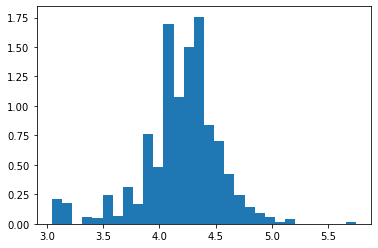

In [563]:
plt.hist(np.log(data['LotFrontage']), density=True, bins=30)  # density=False would make counts

In [564]:
# Log lot frontage for normal distribution and then impute NA's with mean
data['LotFrontage_log'] = np.log(data['LotFrontage'])
data.loc[data['LotFrontage_log'].isna(), 'LotFrontage_log'] = np.mean(data['LotFrontage_log'])

# Drop original non-log variable
# Drop Numerical and Categorical columns of no use
columns = ['LotFrontage']
data.drop(columns=columns, inplace=True)
data.shape

(1460, 82)

In [565]:
# Now let's check alley variable
# May have to drop alley... not enough information. Will come back to this
data.loc[data['Alley'].isna()]

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,YearBuilt_Bucket,YearRemodAdd_Bucket,MoSold_Buckets,LotFrontage_log
0,60,RL,8450,Pave,NaN,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,2000s,2000s,Q1,4.174387
1,20,RL,9600,Pave,NaN,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,70s,70s,Q2,4.382027
2,60,RL,11250,Pave,NaN,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,2000s,2000s,Q3,4.219508
3,70,RL,9550,Pave,NaN,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,old,70s,Q1,4.094345
4,60,RL,14260,Pave,NaN,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,2000s,2000s,Q4,4.430817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,NaN,Reg,Lvl,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000,90s,2000s,Q3,4.127134
1456,20,RL,13175,Pave,NaN,Reg,Lvl,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000,70s,80s,Q1,4.442651
1457,70,RL,9042,Pave,NaN,Reg,Lvl,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500,40s,2000s,Q2,4.189655
1458,20,RL,9717,Pave,NaN,Reg,Lvl,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,

In [566]:
# Basement types
# It seems like when one of the values are missing, they are all missing
# Might want to drop all rows with those values and continue OR impute with a 'NAN' filler
#data.loc[(data['BsmtQual'].isna()) & (data['BsmtCond'].isna()) & (data['BsmtFinType1'].isna())
#         & (data['YearBuilt'] < 2000)]

In [567]:
# Impute all basement types with mode
# We will do another dataset where we do a list-wise deletion of observations in each of thsoe rows

data.loc[data['BsmtQual'].isna(), 'BsmtQual'] = data['BsmtQual'].mode()[0]
data.loc[data['BsmtCond'].isna(), 'BsmtCond'] = data['BsmtCond'].mode()[0]
data.loc[data['BsmtExposure'].isna(), 'BsmtExposure'] = data['BsmtExposure'].mode()[0]
data.loc[data['BsmtFinType1'].isna(), 'BsmtFinType1'] = data['BsmtFinType1'].mode()[0]
data.loc[data['BsmtFinType2'].isna(), 'BsmtFinType2'] = data['BsmtFinType2'].mode()[0]

In [568]:
# Impute mode for MasVnr and replace 0 for MasArea for mode
# Will run another dataset with list-wise deletion
data.loc[data['MasVnrType'].isna(), 'MasVnrType'] = data['MasVnrType'].mode()[0]
data.loc[data['MasVnrArea'].isna(), 'MasVnrArea'] = data['MasVnrArea'].mode()[0]

In [569]:
data.isna().sum()

MSSubClass                0
MSZoning                  0
LotArea                   0
Street                    0
Alley                  1369
LotShape                  0
LandContour               0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                0
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                0
BsmtFinType2              0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF         

In [570]:
# Replace Electrical with mode
data.loc[data.Electrical.isna(), 'Electrical'] = data.Electrical.mode()[0]

In [571]:
# There was a nomenclature error where when fireplaces = 0, it would show NA for Fireplace Quality
# We will feature engineer a new category within fireplace quality to account for 'None' instead of NA
data.loc[data['FireplaceQu'].isna(), 'FireplaceQu'] = 'None'
data['FireplaceQu'].value_counts()

None    690
Gd      380
TA      313
Fa       33
Ex       24
Po       20
Name: FireplaceQu, dtype: int64

In [572]:
# Garage variables
data.isna().sum()

MSSubClass                0
MSZoning                  0
LotArea                   0
Street                    0
Alley                  1369
LotShape                  0
LandContour               0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                0
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                0
BsmtFinType2              0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF         

In [573]:
# Feature engineer garage types to include 'None' type for 0 garages
# Change year variables to categorical
data.loc[(data['GarageType'].isna()) & (data['GarageYrBlt'].isna()) & (data['GarageFinish'].isna())
        &(data['GarageQual'].isna()) & (data['GarageCond'].isna())]

# Replace the no garages with none type for categorical and 0 for numerical
data.loc[data['GarageType'].isna(), 'GarageType'] = 'None'
data.loc[data['GarageFinish'].isna(), 'GarageFinish'] = 'None'
data.loc[data['GarageQual'].isna(), 'GarageQual'] = 'None'
data.loc[data['GarageCond'].isna(), 'GarageCond'] = 'None'

# Apply year buckets to GarageYrBlt
data['GarageYrBlt_Buckets'] = data['GarageYrBlt'].apply(year_buckets)

# Fill NA after creating buckets
data.loc[data['GarageYrBlt'].isna(), 'GarageYrBlt'] = 'None'
data.loc[data['GarageYrBlt_Buckets'].isna(), 'GarageYrBlt_Buckets'] = 'None'

# Once values are imputated, change to string
data['GarageYrBlt'] = data['GarageYrBlt'].astype(str)

In [574]:
data.isna().sum()

MSSubClass                0
MSZoning                  0
LotArea                   0
Street                    0
Alley                  1369
LotShape                  0
LandContour               0
LotConfig                 0
LandSlope                 0
Neighborhood              0
Condition1                0
Condition2                0
BldgType                  0
HouseStyle                0
OverallQual               0
OverallCond               0
YearBuilt                 0
YearRemodAdd              0
RoofStyle                 0
RoofMatl                  0
Exterior1st               0
Exterior2nd               0
MasVnrType                0
MasVnrArea                0
ExterQual                 0
ExterCond                 0
Foundation                0
BsmtQual                  0
BsmtCond                  0
BsmtExposure              0
BsmtFinType1              0
BsmtFinSF1                0
BsmtFinType2              0
BsmtFinSF2                0
BsmtUnfSF                 0
TotalBsmtSF         

In [575]:
# Check the Pool QC spots
data.loc[data['PoolQC'].isna(), ['PoolQC']] = 'None'

In [576]:
# Check Fence NA values
# Impute NA values with None
data.loc[data['Fence'].isna(), 'Fence'] = 'None'

In [577]:
# Check MiscFeature NA values
data.loc[data['MiscFeature'].isna(), 'MiscFeature'] = 'None'

In [578]:
# Check Alley Na values and fill with None
data.loc[data['Alley'].isna(), 'Alley'] = 'None'

In [579]:
# Check and make sure all NA's are handled
data.isna().sum()

MSSubClass             0
MSZoning               0
LotArea                0
Street                 0
Alley                  0
LotShape               0
LandContour            0
LotConfig              0
LandSlope              0
Neighborhood           0
Condition1             0
Condition2             0
BldgType               0
HouseStyle             0
OverallQual            0
OverallCond            0
YearBuilt              0
YearRemodAdd           0
RoofStyle              0
RoofMatl               0
Exterior1st            0
Exterior2nd            0
MasVnrType             0
MasVnrArea             0
ExterQual              0
ExterCond              0
Foundation             0
BsmtQual               0
BsmtCond               0
BsmtExposure           0
BsmtFinType1           0
BsmtFinSF1             0
BsmtFinType2           0
BsmtFinSF2             0
BsmtUnfSF              0
TotalBsmtSF            0
Heating                0
HeatingQC              0
CentralAir             0
Electrical             0


In [582]:
data.describe(exclude='number').columns.tolist()

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition',
 'YearBuilt_Bucket',
 'YearRemodAdd_Bucket',
 'MoSold_Buckets',
 'GarageYrBlt_Buckets']

In [639]:
# Get Dummy Variables 
cat_cols = data.describe(exclude='number').columns.tolist()

dummy_vars = pd.get_dummies(data[cat_cols])
new_data = pd.concat([data, dummy_vars], axis=1)
new_data.drop(columns=cat_cols, inplace=True, axis=1)

new_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice,LotFrontage_log,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_None,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1872,YearBuilt_1875,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1898,YearBuilt_1900,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,...,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,Bsm

In [647]:
# Get Dummy Variables 
#feats_to_encode = data.describe(exclude='number').columns.tolist()
feats_to_scale = data.describe(exclude='object').columns.tolist()
feats_to_scale

['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice',
 'LotFrontage_log']

In [643]:
## Fit final model with scaled features now
from sklearn.preprocessing import StandardScaler, OneHotEncoder
scaler = StandardScaler()
scaled_columns = scaler.fit_transform(data[feats_to_scale])
scaled_df = pd.DataFrame(scaled_columns)
scaled_df.columns = feats_to_scale

# Drop feats
new_data.drop(columns=feats_to_scale, inplace=True, axis=1)
final_data = pd.concat([scaled_df, new_data], axis=1)
final_data = pd.DataFrame(final_data)
final_data.shape

(1460, 608)

In [644]:
X = final_data.drop(columns='SalePrice', axis=1)
y = final_data[['SalePrice']]

# LR Method THEN L1, L2 method THEN we will go into Random Forest Method

KFold is a cross-validator that divides the dataset into k folds.  
Stratified is to ensure that each fold of dataset has the same proportion of observations with a given label.  
We should prefer StratifiedKFold over KFold when dealing with classifications tasks with imbalanced class distributions.

In [659]:
clf = Lasso()
cv = KFold(n_splits=5, shuffle=True)
cross_val_score(clf, X, y, cv=cv)

array([-6.49957530e-03, -1.01547133e-03, -3.40647422e-03, -2.09715176e-02,
       -8.15248785e-05])

In [654]:
# Lasso models
lasso = Lasso()
lasso.alpha = 1
lasso.fit(X,y)

Lasso(alpha=1)

In [657]:
# If coefficients are all 0, then we UNDERFIT this model... our alpha is too high, so decrease alpha penalty
lasso.coef_

array([-0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0., -0.,  0., -0.,  0., -0.,  0., -0., -0.,  0., -0.,
        0., -0.,  0.,  0.,  0., -0., -0.,  0.,  0., -0.,  0.,  0., -0.,
        0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0., -0., -0.,  0.,  0.,  0., -0., -0., -0.,  0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0., -0., -0., -0.,  0.,
       -0., -0., -0.,  0., -0.,  0., -0., -0., -0., -0.,  0., -0., -0.,
       -0.,  0.,  0., -0., -0., -0., -0., -0.,  0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0.,  0.,  0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0

In [665]:
alpha = 0.01
for i in range(5):
    lasso.alpha = alpha
    lasso.fit(X, y)
    print(f'Model {i} coefficients for alpha {alpha} are', lasso.coef_)
    print('---------------------------------------------------------')
    alpha -= 0.002

Model 0 coefficients for alpha 0.01 are [-0.07413053  0.04184762  0.25529647  0.0556134   0.05153359  0.04147619
  0.         -0.          0.03082141  0.00926267  0.         -0.00891655
  0.26571606  0.04356704  0.          0.05253125  0.01928153 -0.01871115
 -0.02552139  0.02230515  0.03560299  0.11129273  0.          0.03273954
 -0.         -0.00326035  0.0029952   0.02211954 -0.         -0.
  0.         -0.          0.         -0.          0.         -0.0540203
 -0.          0.         -0.          0.         -0.          0.
  0.         -0.         -0.00747963 -0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.          0.         -0.          0.         -0.         -0.
 -0.          0.         -0.         -0.         -0.         -0.
  0.09773257  0.07199824 -0.         -0.          0.         -0.
  0.          0.         -0.          0.         -0.         -0.
  0.0957190

In [694]:
alpha = [0.007, 0.006, 0.005, 0.004]
l1_model = Lasso()
cv = KFold(n_splits=5, shuffle=True)
for i in alpha:
    l1_model.alpha = i
    print(i,cross_val_score(l1_model, X, y, cv=cv))
    print('---------------------------------------------------------')

0.007 [0.87186549 0.64848989 0.83126446 0.88006221 0.86015585]
---------------------------------------------------------
0.006 [0.83208575 0.85207319 0.86249504 0.66062362 0.88604954]
---------------------------------------------------------
0.005 [0.73795602 0.88936617 0.76734995 0.85486618 0.86174822]
---------------------------------------------------------
0.004 [0.90258556 0.57103606 0.8475099  0.89422998 0.82637302]
---------------------------------------------------------


In [716]:
# 0.006 is our alpha of choice
data.shape

(1460, 83)

In [725]:
l1_model = Lasso(alpha=0.0075)
l1_model.fit(X,y)

l1_model_df = pd.DataFrame(l1_model.coef_, X.columns, columns=['l1_coef'])
l1_model_df.reset_index(inplace = True)
l1_model_df.rename(columns = {'index': 'features'}, inplace = True)
l1_model_df.l1_coef = l1_model_df.l1_coef.round(4)

l1_final = l1_model_df.loc[l1_model_df['l1_coef'] != 0]
l1_feats = l1_final.features.tolist()

In [726]:
# L2 on l1 feats
X_l1 = X[l1_feats]
l2_model = Ridge()
l2_model.fit(X_l1, y)

Ridge()

In [768]:
alpha = [0.001,0.01,0.1,1,10,20,30,40,50,60,70,80,90,100]

for i in alpha:
    l2_model.alpha = i
    cross_val_score(l2_model, X_l1, y)
    print(i, np.mean(cross_val_score(l2_model, X_l1, y, cv=cv)))
    print('---------------------------------------------------------')

0.001 0.842738454933116
---------------------------------------------------------
0.01 0.8437351657129245
---------------------------------------------------------
0.1 0.8218930945140934
---------------------------------------------------------
1 0.8187920809178799
---------------------------------------------------------
10 0.8559574183183969
---------------------------------------------------------
20 0.8592321291159033
---------------------------------------------------------
30 0.8425729205065491
---------------------------------------------------------
40 0.8365200269469273
---------------------------------------------------------
50 0.8268964624080366
---------------------------------------------------------
60 0.8363684389628577
---------------------------------------------------------
70 0.8414184166437378
---------------------------------------------------------
80 0.7978032209826063
---------------------------------------------------------
90 0.8275652513518408
--------------

In [780]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
cross_val_score(rf, X, y.values.ravel(), cv=cv)

array([0.83051788, 0.90146583, 0.83023172, 0.84793803, 0.88057126])

In [789]:
estimators = [46,48,50,52,54]

for i in estimators:
    rf = RandomForestRegressor(n_estimators=i)
    print(i, cross_val_score(rf, X, y.values.ravel(), cv=cv))
    print('---------------------------------------------------------')

46 [0.88040509 0.86767859 0.81953718 0.87965191 0.79056282]
---------------------------------------------------------
48 [0.89179253 0.90476538 0.81155946 0.89268375 0.80658291]
---------------------------------------------------------
50 [0.83021258 0.88247688 0.88227124 0.81532251 0.89049694]
---------------------------------------------------------
52 [0.83814979 0.83381477 0.90849042 0.80570396 0.88210563]
---------------------------------------------------------
54 [0.83708421 0.85971223 0.86663445 0.86917052 0.82503696]
---------------------------------------------------------


# 

In [33]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

In [32]:
import sklearn